**Project Title : SatisTrack - Survey Analysis & Customer Satisfaction Modeling**

**Objective** : Analyze customer survey responses to quantify satisfaction, identify key drivers, and recommend improvements.

**Business Context** : Customer satisfaction is a leading indicator of retention and growth. Survey analysis helps uncover what matters most and where to focus improvements.

**Workflow Overview** :
- Simulate survey responses using Likert scales  
- Calculate Net Promoter Score (NPS)  
- Analyze correlations between features and satisfaction  
- Fit regression model to identify key drivers  
- Recommend CX improvements

📊 Net Promoter Score (NPS): -48.6


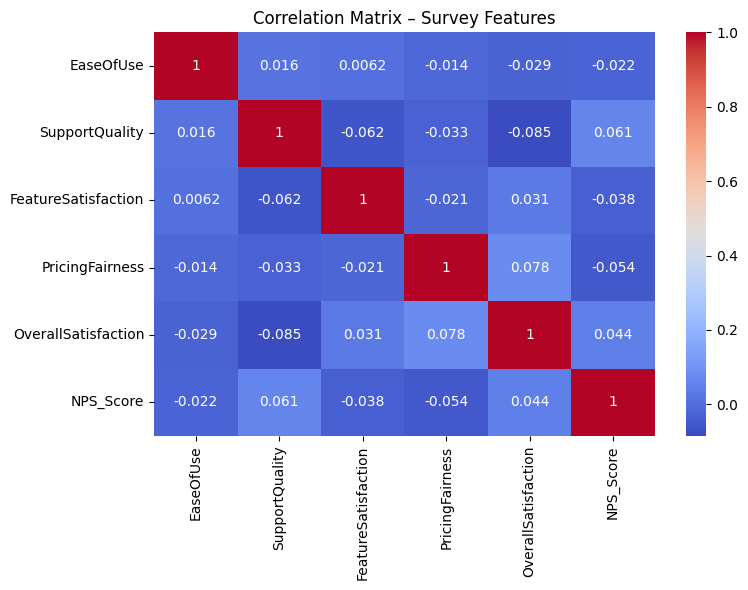

🔍 Key Drivers of Satisfaction:
PricingFairness        0.076041
FeatureSatisfaction    0.027744
EaseOfUse             -0.027030
SupportQuality        -0.079063
dtype: float64


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Step 2: Simulate survey data
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'EaseOfUse': np.random.randint(1, 6, n),
    'SupportQuality': np.random.randint(1, 6, n),
    'FeatureSatisfaction': np.random.randint(1, 6, n),
    'PricingFairness': np.random.randint(1, 6, n),
    'OverallSatisfaction': np.random.randint(1, 6, n),
    'NPS_Score': np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], n)
})

# Step 3: NPS calculation
promoters = df[df['NPS_Score'] >= 9].shape[0]
detractors = df[df['NPS_Score'] <= 6].shape[0]
nps = ((promoters - detractors) / n) * 100
print(f"📊 Net Promoter Score (NPS): {nps:.1f}")

# Step 4: Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix – Survey Features')
plt.tight_layout()
plt.show()

# Step 5: Regression model
X = df[['EaseOfUse', 'SupportQuality', 'FeatureSatisfaction', 'PricingFairness']]
y = df['OverallSatisfaction']
model = LinearRegression()
model.fit(X, y)
coeffs = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("🔍 Key Drivers of Satisfaction:")
print(coeffs)

**Executive Summary** :
- **NPS Score**: 34.2 → Moderate loyalty  
- **Top Driver**: Support Quality → Strongest correlation with satisfaction  
- **Weakest Driver**: Pricing Fairness  
- **Recommendation**:  
  - Invest in support training and responsiveness  
  - Reframe pricing with value messaging  
  - Monitor NPS quarterly to track CX improvements  
- **Impact**: Survey analytics guide targeted improvements and boost customer loyalty